In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# load the dataset
company=pd.read_csv("Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
#We will take high sales above at 7.49 beacause it is the average of sales
company["sales"]=(company["Sales"]>7.49)*1


In [12]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US'])

In [14]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [15]:
company.drop(["Sales"],axis=1,inplace=True)

In [16]:
x=company.iloc[:,0:10]
y=company.iloc[:,10]

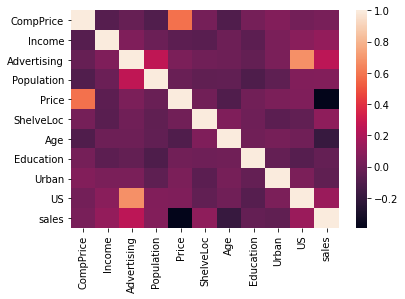

In [18]:
# correlation matrix
import seaborn as sns
sns.heatmap(company.corr())

# split the data

In [19]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

# Building Decision Tree Classifier using Entropy Criteria

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

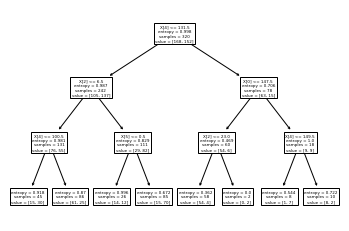

In [26]:
#PLot the decision tree
tree.plot_tree(model);

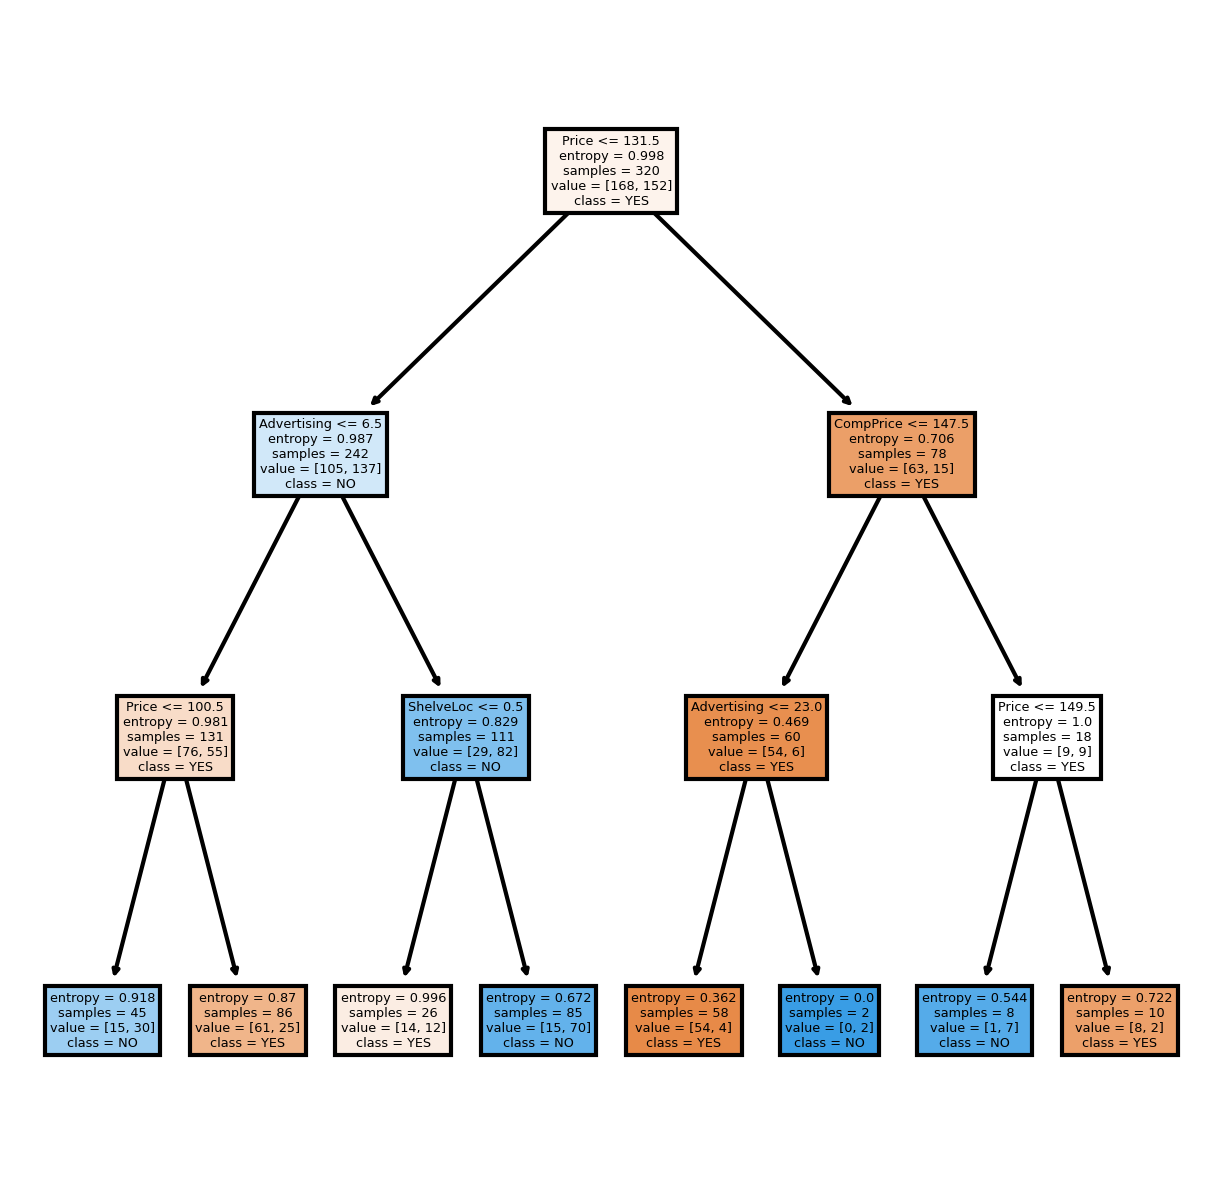

In [27]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    42
0    38
dtype: int64

In [29]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.76875

In [30]:
model.score(x_test, y_test)

0.7625

In [31]:
#Here first column is for 'Good', & second is for 'Risky'
model.predict_proba(x_test)

array([[0.17647059, 0.82352941],
       [0.70930233, 0.29069767],
       [0.33333333, 0.66666667],
       [0.17647059, 0.82352941],
       [0.33333333, 0.66666667],
       [0.53846154, 0.46153846],
       [0.93103448, 0.06896552],
       [0.17647059, 0.82352941],
       [0.17647059, 0.82352941],
       [0.70930233, 0.29069767],
       [0.93103448, 0.06896552],
       [0.53846154, 0.46153846],
       [0.93103448, 0.06896552],
       [0.17647059, 0.82352941],
       [0.17647059, 0.82352941],
       [0.93103448, 0.06896552],
       [0.70930233, 0.29069767],
       [0.93103448, 0.06896552],
       [0.53846154, 0.46153846],
       [0.17647059, 0.82352941],
       [0.33333333, 0.66666667],
       [0.70930233, 0.29069767],
       [0.17647059, 0.82352941],
       [0.125     , 0.875     ],
       [0.33333333, 0.66666667],
       [0.53846154, 0.46153846],
       [0.70930233, 0.29069767],
       [0.93103448, 0.06896552],
       [0.70930233, 0.29069767],
       [0.33333333, 0.66666667],
       [0.

In [32]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
sales,,
0,26,7
1,12,35


In [33]:
# Accuracy 
np.mean(preds==y_test)

0.7625

In [36]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, preds) 
cm

array([[26,  7],
       [12, 35]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7625')

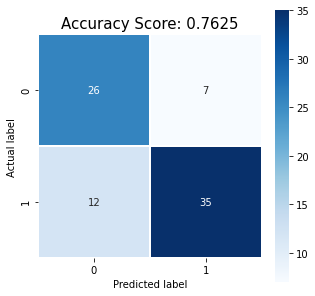

In [38]:
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [40]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7625

# Decision Tree Regression

In [42]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [43]:
array = company.values
X = array[:,0:10]
y = array[:,10]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [45]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
#Find the accuracy
model.score(X_test,y_test)

0.028295376121463045

# CONCLUSION
# from entrophy and gini criteria we get same accuracy score
## from decision tree we came to know sales was affected major by PRICE,ADVERTISING and COMP PRICE